In [43]:
import pandas as pd
import math
from matplotlib import pyplot as py

df = pd.read_csv('./Assignment 4 - Sheet1.csv')

print (df)

    Airport.Code                                 Airport.Name Time.Label  \
0            JFK  New York, NY: John F. Kennedy International    2004/01   
1            JFK  New York, NY: John F. Kennedy International    2004/02   
2            JFK  New York, NY: John F. Kennedy International    2004/03   
3            JFK  New York, NY: John F. Kennedy International    2004/04   
4            JFK  New York, NY: John F. Kennedy International    2004/05   
..           ...                                          ...        ...   
283          SAN       San Diego, CA: San Diego International    2015/08   
284          SAN       San Diego, CA: San Diego International     2015/9   
285          SAN       San Diego, CA: San Diego International    2015/10   
286          SAN       San Diego, CA: San Diego International    2015/11   
287          SAN       San Diego, CA: San Diego International    2015/12   

     Time.Month Time.Month Name  Time.Year  Statistics.# of Delays.Carrier  \
0        

SS of SAN delays: 19978858.0
Standard error of SAN delays: 31.148423103734512
Sample mean of SAN delays: 1328.5
T-statistic of SAN delays: -34.39981524687629
Effect size of SAN delay: -2.866651270573024


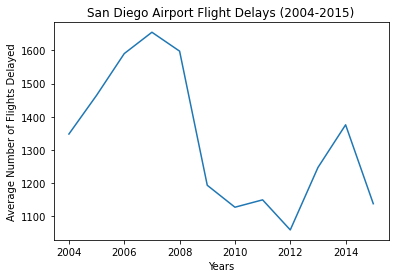

In [44]:
#1
san = df.loc[df['Airport.Code'] == 'SAN']

#avgdelay = y axis, years = x axis
avgdelay = [0.0] * 12
years = [0] * 12

#Initializes years and avgdelay
for i in range (2004,2016):
    years[i - 2004] = i
    oneyear = san.loc[san['Time.Year'] == i]
    avgdelay[i - 2004] = sum(oneyear['Statistics.Flights.Delayed'])/len(oneyear['Statistics.Flights.Delayed'])

py.plot(years, avgdelay)
py.title('San Diego Airport Flight Delays (2004-2015)')
py.xlabel('Years')
py.ylabel('Average Number of Flights Delayed')

#2
# This is a two tailed test

#3 H0 and H1
# H0 = (mu_san == mu_pop) = (mu_san == 2400)
# H1 = (mu_san != mu_pop) = (mu_san != 2400)

#4 degrees of freedom = n - 1
# n = 144, n-1 = 143

#5 SS of SAN
meanSANdelay = sum(san['Statistics.Flights.Delayed'])/len(san['Statistics.Flights.Delayed'])
ssSAN = 0.0
delaySAN = san['Statistics.Flights.Delayed']
for i in range(len(delaySAN)):
    ssSAN += (delaySAN[i + 144] - meanSANdelay) * (delaySAN[i + 144] - meanSANdelay)
print('SS of SAN delays: ' + str(ssSAN))

#6 Standard error of the mean (S_(X))
sdsdm = math.sqrt(ssSAN / 143)
sesdm = sdsdm/(math.sqrt(144))
print('Standard error of SAN delays: ' + str(sesdm))

#7 Sample mean
print('Sample mean of SAN delays: ' + str(meanSANdelay))

#8 T-test statistic
tSAN = (meanSANdelay - 2400)/sesdm
print('T-statistic of SAN delays: ' + str(tSAN))

#9 T-Score of alpha = .05, degress of freedom = `143
# t-score = 1.9766

#10 Effect size, Cohen's d = (sample mean - population mean) / standard deviation of the sample
effectsizeSAN = (meanSANdelay - 2400) / sdsdm
print('Effect size of SAN delay: ' + str(effectsizeSAN))

#11 Reject

#12 The average number of San Diego airport delays is statistically 
# significantly different from the average number of airport delays


In [45]:
#13 one tailed 

#14 H0 num_jfk <= num_san, H1 = num_jfk > num_san

#15 num degrees of freedom = n1+n2-2
# n1+n2-2 = 144 + 144 - 2 = 286

#16 pooled variance (sp^2) = (ss_1)/(n_1-1) + (ss_2)/(n_2-1)
jfk = df.loc[df['Airport.Code'] == 'JFK']

meanSANWdelay = sum(san['Statistics.# of Delays.Weather'])/len(san['Statistics.# of Delays.Weather'])
ssSANW = 0.0
delaySANW = san['Statistics.# of Delays.Weather']
for i in range(len(delaySANW)):
    ssSANW += (delaySANW[i + 144] - meanSANWdelay) * (delaySANW[i + 144] - meanSANWdelay)
print('SS of SAN delays: ' + str(ssSANW))

meanJFKWdelay = sum(jfk['Statistics.# of Delays.Weather'])/len(jfk['Statistics.# of Delays.Weather'])
ssJFKW = 0.0
delayJFKW = jfk['Statistics.# of Delays.Weather']
for i in range(len(delayJFKW)):
    ssJFKW += (delayJFKW[i] - meanJFKWdelay) * (delayJFKW[i] - meanJFKWdelay)
print('SS of JFK delays: ' + str(ssJFKW))
sp2 = (ssSANW + ssJFKW)/(286)

print('pooled var of JFKW and SANW: ' + str(sp2))

#17 standard error (s_(meanJFKW-meanSANW)) = sqrt((sp2/n1)+(sp2/n2))
seSJ = math.sqrt((sp2/144)+(sp2/144))
print('standard err of JFKW and SANW: ' + str(seSJ))

#18 t-statistic of SANW and JFKW
tSANJFK = (meanJFKWdelay - meanSANWdelay)/seSJ
print('t statistic of JFKW and SANW: ' + str(tSANJFK))

#19 effect size, Cohen's d = (mean(x_1) - mean(x_2))/(sqrt(sp2))
effectsizeSANJFK = (meanJFKWdelay - meanSANWdelay)/(math.sqrt(sp2))
print('effect size of JFKW and SANW: ' + str(effectsizeSANJFK))

#20 reject the null hypothesis

#21 The t-statistic is statistically significant since the t-statistic
# is far greater than the t-score given an alpha level of .5 and 268 degrees 
# of freedom. The t-score is approximately 1.65, while the t-statistic is
# 10.06, indicating that the amount JFK airport weather delays are greater
# than the amount of SAN airport weather delays. With the t-statistic indicating
# that these delays happen more likely than by chance.

SS of SAN delays: 29089.000000000004
SS of JFK delays: 318921.4375
pooled var of JFKW and SANW: 1216.8197115384614
standard err of JFKW and SANW: 4.11099425581787
t statistic of JFKW and SANW: 10.059407552842561
effect size of JFKW and SANW: 1.1855125492223582


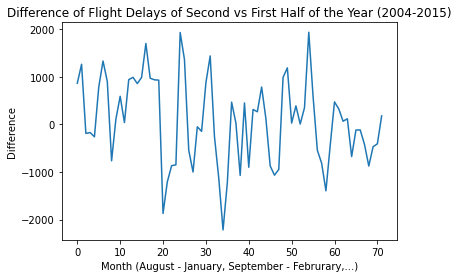

70.59722222222223
ssDelayDiff: 57463039.31944445
sdDelayDiff: 899.6324704922596
Standard error of delay Diff: 106.0227034101139
T-Statistic of Delay Diff: 0.6658689125209355
Effect size of Delay Diff: 0.07847340390414426


In [150]:
# 22 plot for each year, the second half delays - first half delays
jfkFirst = df.loc[(df['Airport.Code'] == "JFK") & (df['Time.Month'] <= 6) & (df['Time.Month'] >= 1)]

jfkSecond = df.loc[(df['Airport.Code'] == "JFK") & (df['Time.Month'] <= 12) & (df['Time.Month'] >= 7)]

jfkFirst = jfkFirst.reset_index()
jfkSecond = jfkSecond.reset_index()
months = [0.0] * 72
flightDelayDiff = [0.0] * 72

firstDelays = jfkFirst['Statistics.Flights.Delayed'][:]
secondDelays = jfkSecond['Statistics.Flights.Delayed'][:]

for i in range(len(months)):
    months[i] = i
    flightDelayDiff[i] = secondDelays[i] - firstDelays[i]
    
py.plot(months, flightDelayDiff)
py.xlabel('Month (August - January, September - Februrary,...)')
py.ylabel('Difference')
py.title('Difference of Flight Delays of Second vs First Half of the Year (2004-2015)')
py.show()

#23 H0 = total second half == total first half, H1 = total second half != total first half

#24 degrees of freedom = n-1 = 12 - 1 = 11

#25 standard error (s_X_D) = s/sqrt(n), s = sqrt(SS/n-1)
meanDelayDiff = sum(flightDelayDiff)/len(flightDelayDiff)
print(meanDelayDiff)
ssDelayDiff = 0.0

for i in range(len(flightDelayDiff)):
    #print(str((flightDelayDiff[i] - meanDelayDiff) * (flightDelayDiff[i] - meanDelayDiff)))
    #print('flightDelayDiff[i]: ' + str(flightDelayDiff[i]) + ' - meanDelayDiff: ' + str(meanDelayDiff))
    ssDelayDiff += (flightDelayDiff[i] - meanDelayDiff) * (flightDelayDiff[i] - meanDelayDiff)
print('ssDelayDiff: ' + str(ssDelayDiff))
sdDelayDiff = math.sqrt(ssDelayDiff/71)
print('sdDelayDiff: ' + str(sdDelayDiff))
seDelayDiff = (sdDelayDiff)/(math.sqrt(72))
print('Standard error of delay Diff: ' + str(seDelayDiff))

#26 t-statistic of delay diff = (Mean delay diff)/standard error delay diff
tDelayDiff = (meanDelayDiff)/seDelayDiff

print('T-Statistic of Delay Diff: ' + str(tDelayDiff))

#27 effect size Cohen's d
effectsizeDelayDiff = (meanDelayDiff/sdDelayDiff)
print('Effect size of Delay Diff: ' +str(effectsizeDelayDiff))